<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicios de Regresión

Ejemplo de regresión utilizando el dataset recolecado de pesos y estaturas de personas<br>

[Dataset source](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
if os.access('weight_height.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv > weight_height.csv
    else:
        !wget weight_height.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv

--2024-09-02 17:06:39--  http://weight_height.csv/
Resolving weight_height.csv (weight_height.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘weight_height.csv’
--2024-09-02 17:06:39--  https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/weight_height.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 428122 (418K) [text/plain]
Saving to: ‘weight_height.csv’

weight_height.csv   100%[===================>] 418.09K  --.-KB/s    in 0.1s    

2024-09-02 17:06:39 (2.76 MB/s) - ‘weight_height.csv’ saved [428122/428122]

FINISHED --2024-09-02 17:06:39--
Total wall clock time: 1.0s
Downloaded: 1 files, 418K in 0.1s (2.76 MB/s)


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [4]:
# Alumno, realice una inspeccion del dataset en búsqueda de elementos faltantes
df = pd.read_csv("weight_height.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699
Nan,0.000000,0.000000
%Nan,0.000000,0.000000


In [5]:
# Alumno, en caso de encontrarse elementos faltantes,
# elimine aquellas filas que tengan columnas vacias
# Escriba el procedimiento tenga o no elementos faltantes
df.dropna(subset='Height',inplace=True)
df.dropna(subset='Weight',inplace=True)

In [7]:
# Alumno, inspeccione el dataset, visualice las columnas que posee y sus primeras filas
df.head()


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [13]:
# Alumno: copie los datos a un nuevo dataset (df2), pero ahora transforme las columnas en
# peso --> proveniente de Weight, debe pasar de libras a kilobramos
# altura --> proveniente de Height, debe pasar de pulgadas a metros
# sexo --> masculino (proveniente de Male) y femenino (proveniente de Female)
df2 = df.copy()
df2['Weight'] = df2['Weight']*0.453592
df2['Height'] = df2['Height']*0.0254
df2['Gender'] = df2['Gender'].apply(lambda x: "Masculino" if x == 'Male' else "Femenino")



In [14]:
# Fin de la limpieza, alumno especifique cuantas filas se poseen para analizar
df2.shape[0]

10000

# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

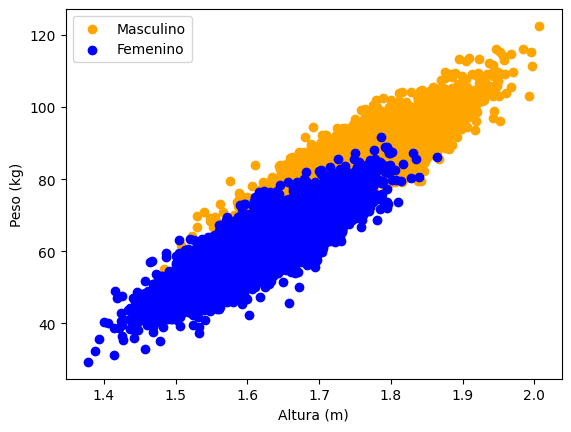

In [19]:

# Alumno graficar el peso (y) en función de la altura (x) pero para ambos sexos por separados
# Se debe realizar todo en un mismo "ax", cada scatter plot con diferente color para ver los dos grupos
y_masculino = df2['Weight'].loc[df2['Gender'] == "Masculino"]
x_masculino = df2['Height'].loc[df2['Gender'] == 'Masculino']
y_femenino = df2['Weight'].loc[df2['Gender']== "Femenino"]
x_femenino = df2['Height'].loc[df2['Gender'] == 'Femenino']
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(x_masculino,y_masculino,color="orange",label="Masculino")
ax.scatter(x_femenino,y_femenino,color="blue",label="Femenino")
ax.set_xlabel("Altura (m)")
ax.set_ylabel("Peso (kg)")
plt.legend()
plt.show()


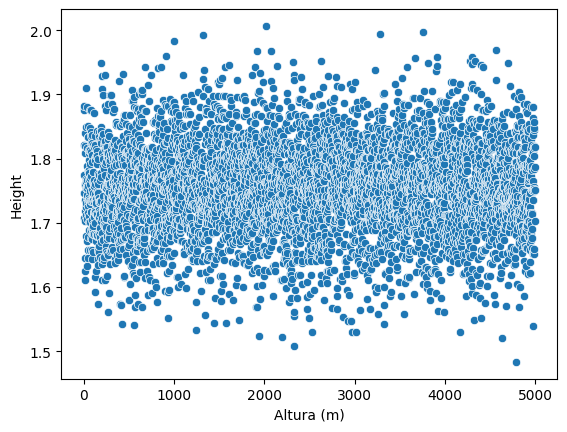

Valor medio: 1.7532691860179221


In [24]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.scatterplot(x_masculino)
plt.xlabel("Altura (m)")
plt.show()
print(f"Valor medio: {np.mean(x_masculino)}")

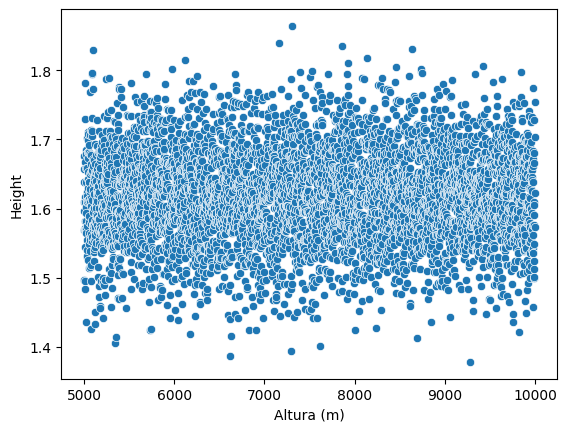

Valor medio: 1.6182028495269967


In [25]:
# Alumno: Dibujar la distribucion (histograma) de la altura en hombres
# Además, imprimir en pantalla el valor medio
sns.scatterplot(x_femenino)
plt.xlabel("Altura (m)")
plt.show()
print(f"Valor medio: {np.mean(x_femenino)}")

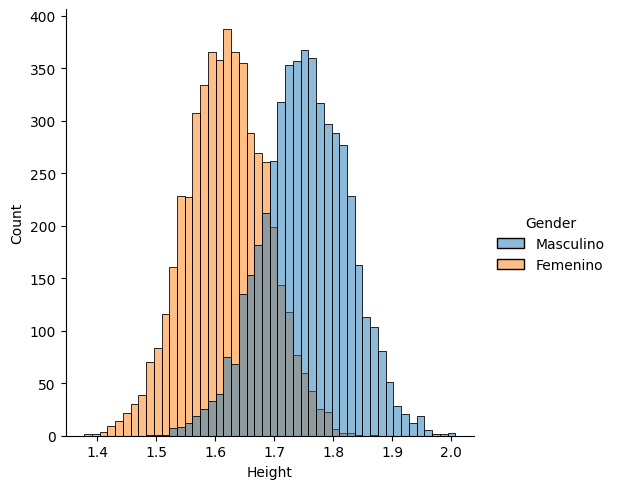

In [26]:
# Alumno: porque no prueba la función displot de seaborn que acepta
# "colorear" según la categoría deseada.
# Ingresar parámetros= data=df2, x="altura", hue="sexo"
sns.displot(data=df2,x="Height",hue="Gender")
plt.show()


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Alumno:<br>
Para esta regresión se utilizará como variable de entrada el peso (X) y como salida la altura (y). Crear el modelo de regresión lineal que sea de su agrado o invierta las variables de salida y entrada si así lo prefiere. Debe elegir trabajar con los datos de sexo masculino o femenino, o duplicar el trabajo y realizar ambos.<br>
Pasor a seguir:
- Obtener las variables X e y (para masculino y/o femenino)
- Dividir el dataset en train y test 70%30%
- Entrenar un modelo de regresión
- Calcular la métrica r2_score del modelo (y_hat vs y_test)
- Dibujar el resultado de la regresion sobre los datos de entrada


Weihgt = Peso
Height = Altura

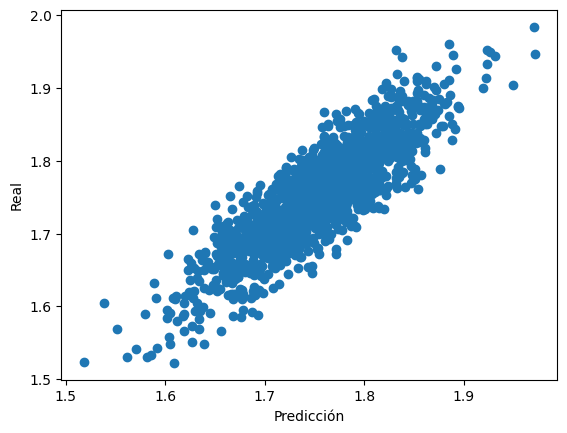

Valor de r2: 0.661463826053036


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = df2['Weight'].loc[df2['Gender'] == "Masculino"].values.reshape(-1,1)
y = df2['Height'].loc[df2['Gender'] == "Masculino"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train,)
y_hat = lr.predict(x_test)
value = r2_score(y_hat,y_test)
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(y_hat,y_test)
ax.set_xlabel("Predicción")
ax.set_ylabel("Real")
plt.show()
print(f"Valor de r2: {value}")


# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">